## Assignment 3, Dataset 10
## Student Name: Paria Ighanian, Student ID: 0200155529


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import collections
from pprint import pprint
import random

In [3]:
# Read the edge list from the file 
facebook_G = nx.read_edgelist('Facebook-Ego/3437_3.edges', nodetype=int)
facebook_num_nodes = facebook_G.number_of_nodes()
print(f'Number of nodes in Facebook Network: {facebook_num_nodes}')

Number of nodes in Facebook Network: 133


## (a) Generate graphs based on Watts-Strogatz Model, and each of them should have the same number of nodes as Facebook-Ego. Please generate 9 graphs with three different values of ¯k and p. Please plot the graph structures, degree distributions, and clustering coefficients as well.


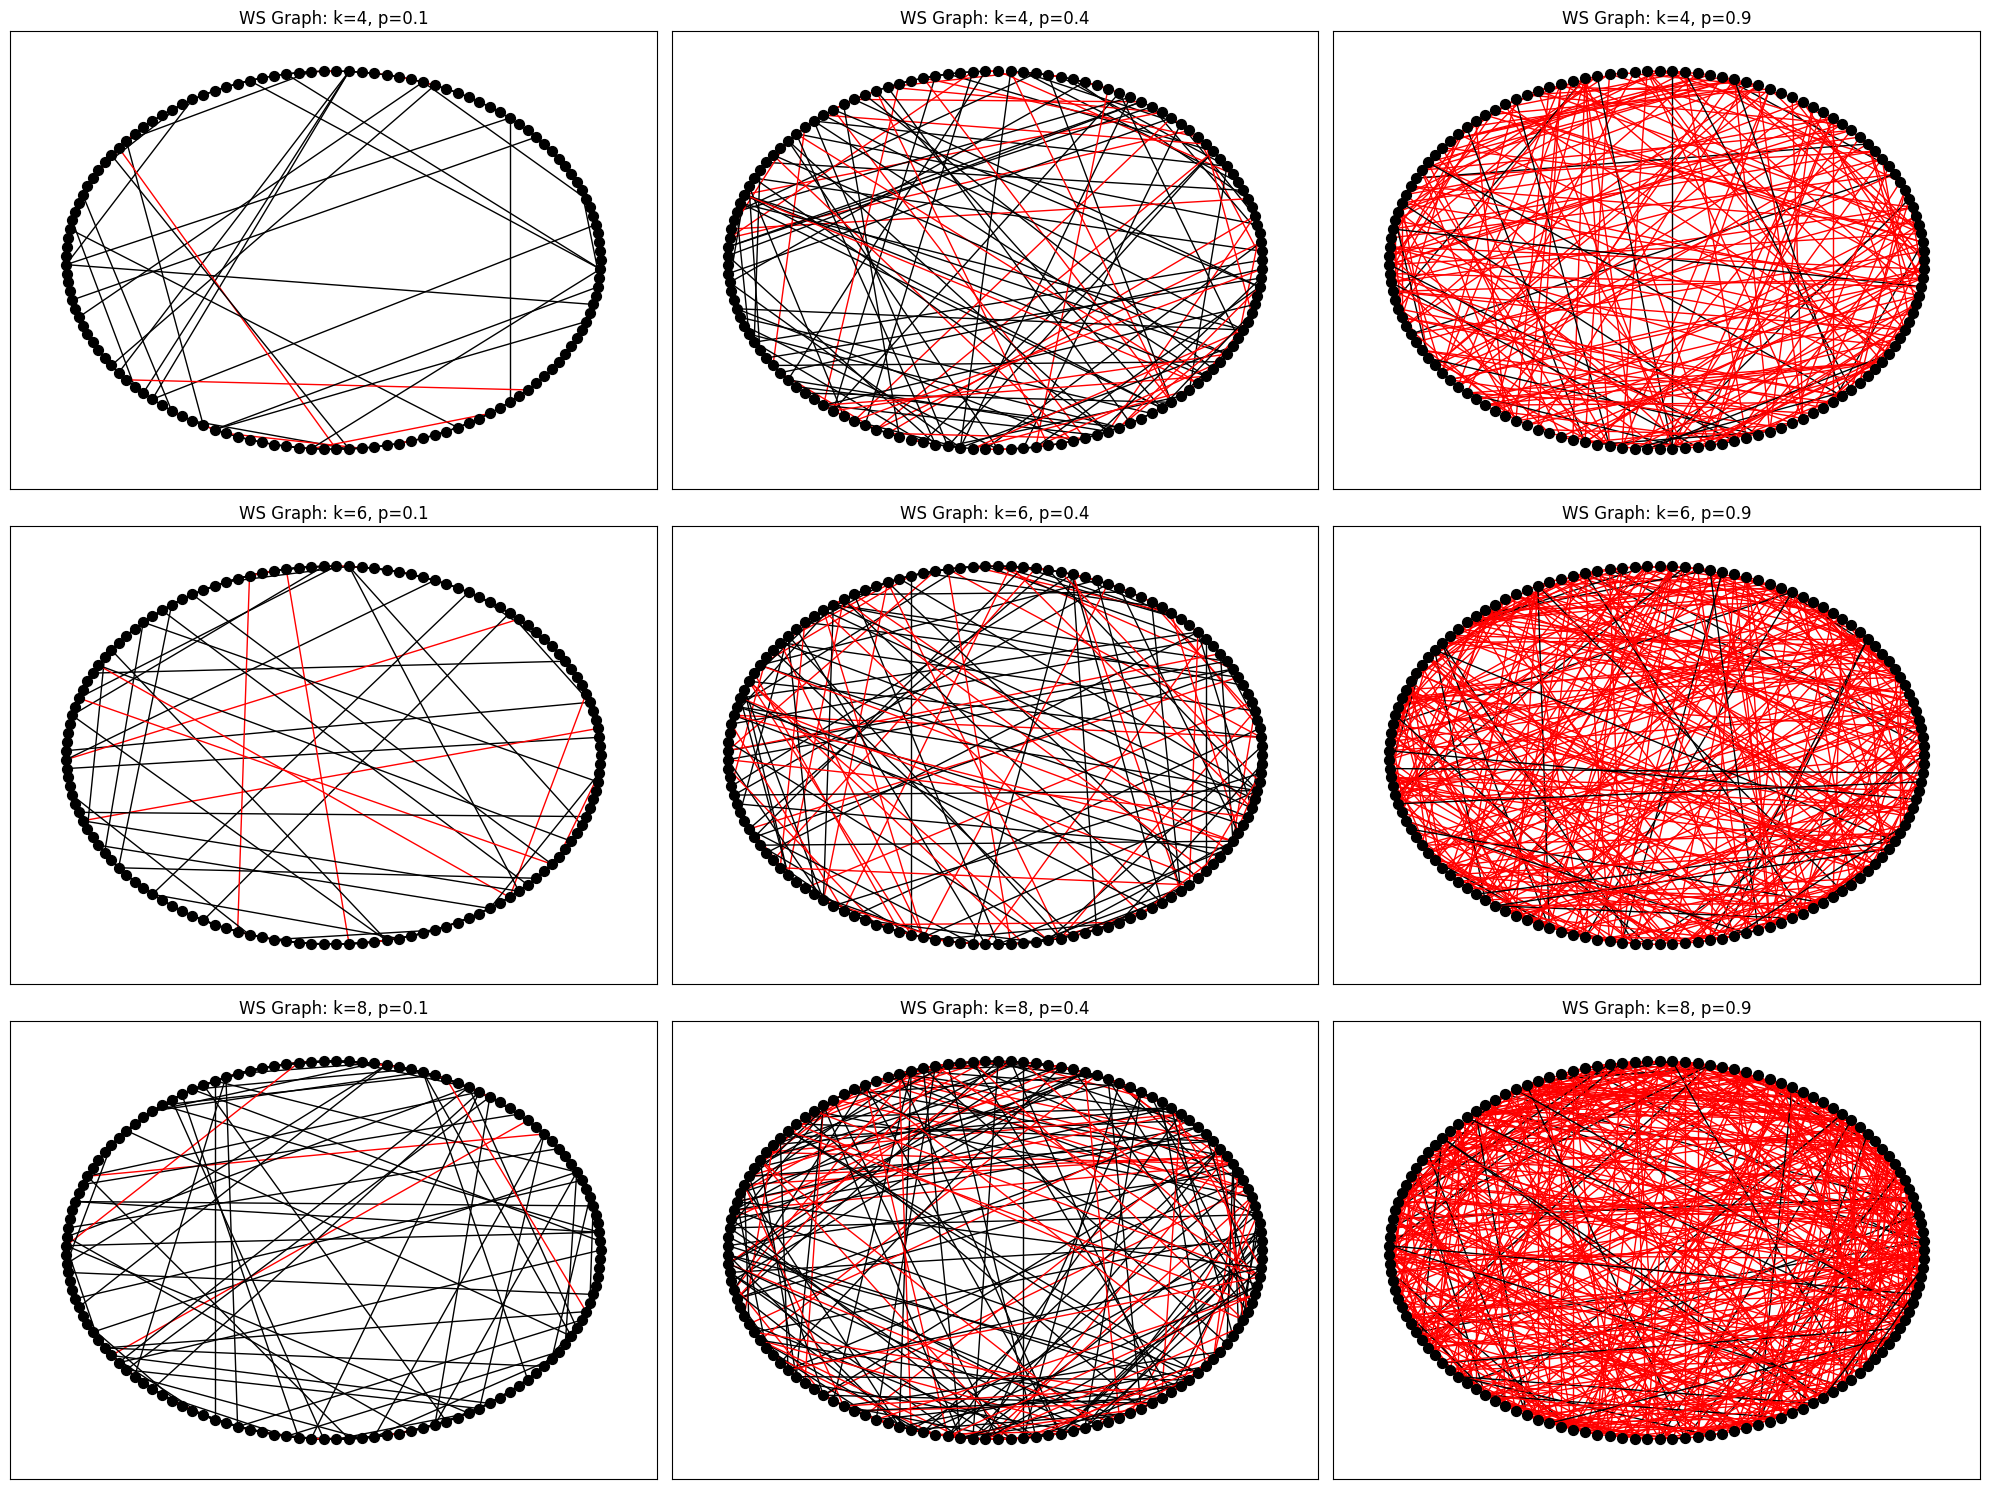

In [19]:
k_values = [4, 6, 8]  # Average degrees
p_values = [0.1, 0.4, 0.9]  # Rewiring probabilities

fig, axs = plt.subplots(len(k_values), len(p_values), figsize=(20, 15))

clustering_coefficients = {}
degree_distributions = {}

for i, k in enumerate(k_values):
    for j, p in enumerate(p_values):
        # Generate Watts-Strogatz graph
        G = nx.watts_strogatz_graph(facebook_num_nodes, k, p)
        
        # Calculate positions 
        pos = nx.circular_layout(G)  
        # Determine edge colors based on rewiring probability
        edge_colors = ['red' if random.random() < p else 'black' for _ in G.edges()]
        
        # Plot the graph structure
        axs[i, j].set_title(f'WS Graph: k={k}, p={p}')
        nx.draw_networkx(G, pos, node_size=50, ax=axs[i, j], with_labels=False, 
                         edge_color=edge_colors, node_color='black')  
        
        # Calculate clustering coefficient
        clustering_coeff = nx.average_clustering(G)
        clustering_coefficients[(k, p)] = clustering_coeff
        
        # Degree distribution
        degrees = [G.degree(n) for n in G.nodes()]
        degree_distribution, bins = np.histogram(degrees, bins=np.arange(min(degrees), max(degrees) + 1.5) - 0.5)
        degree_distributions[(k, p)] = (bins[:-1], degree_distribution)

plt.tight_layout()
plt.show()



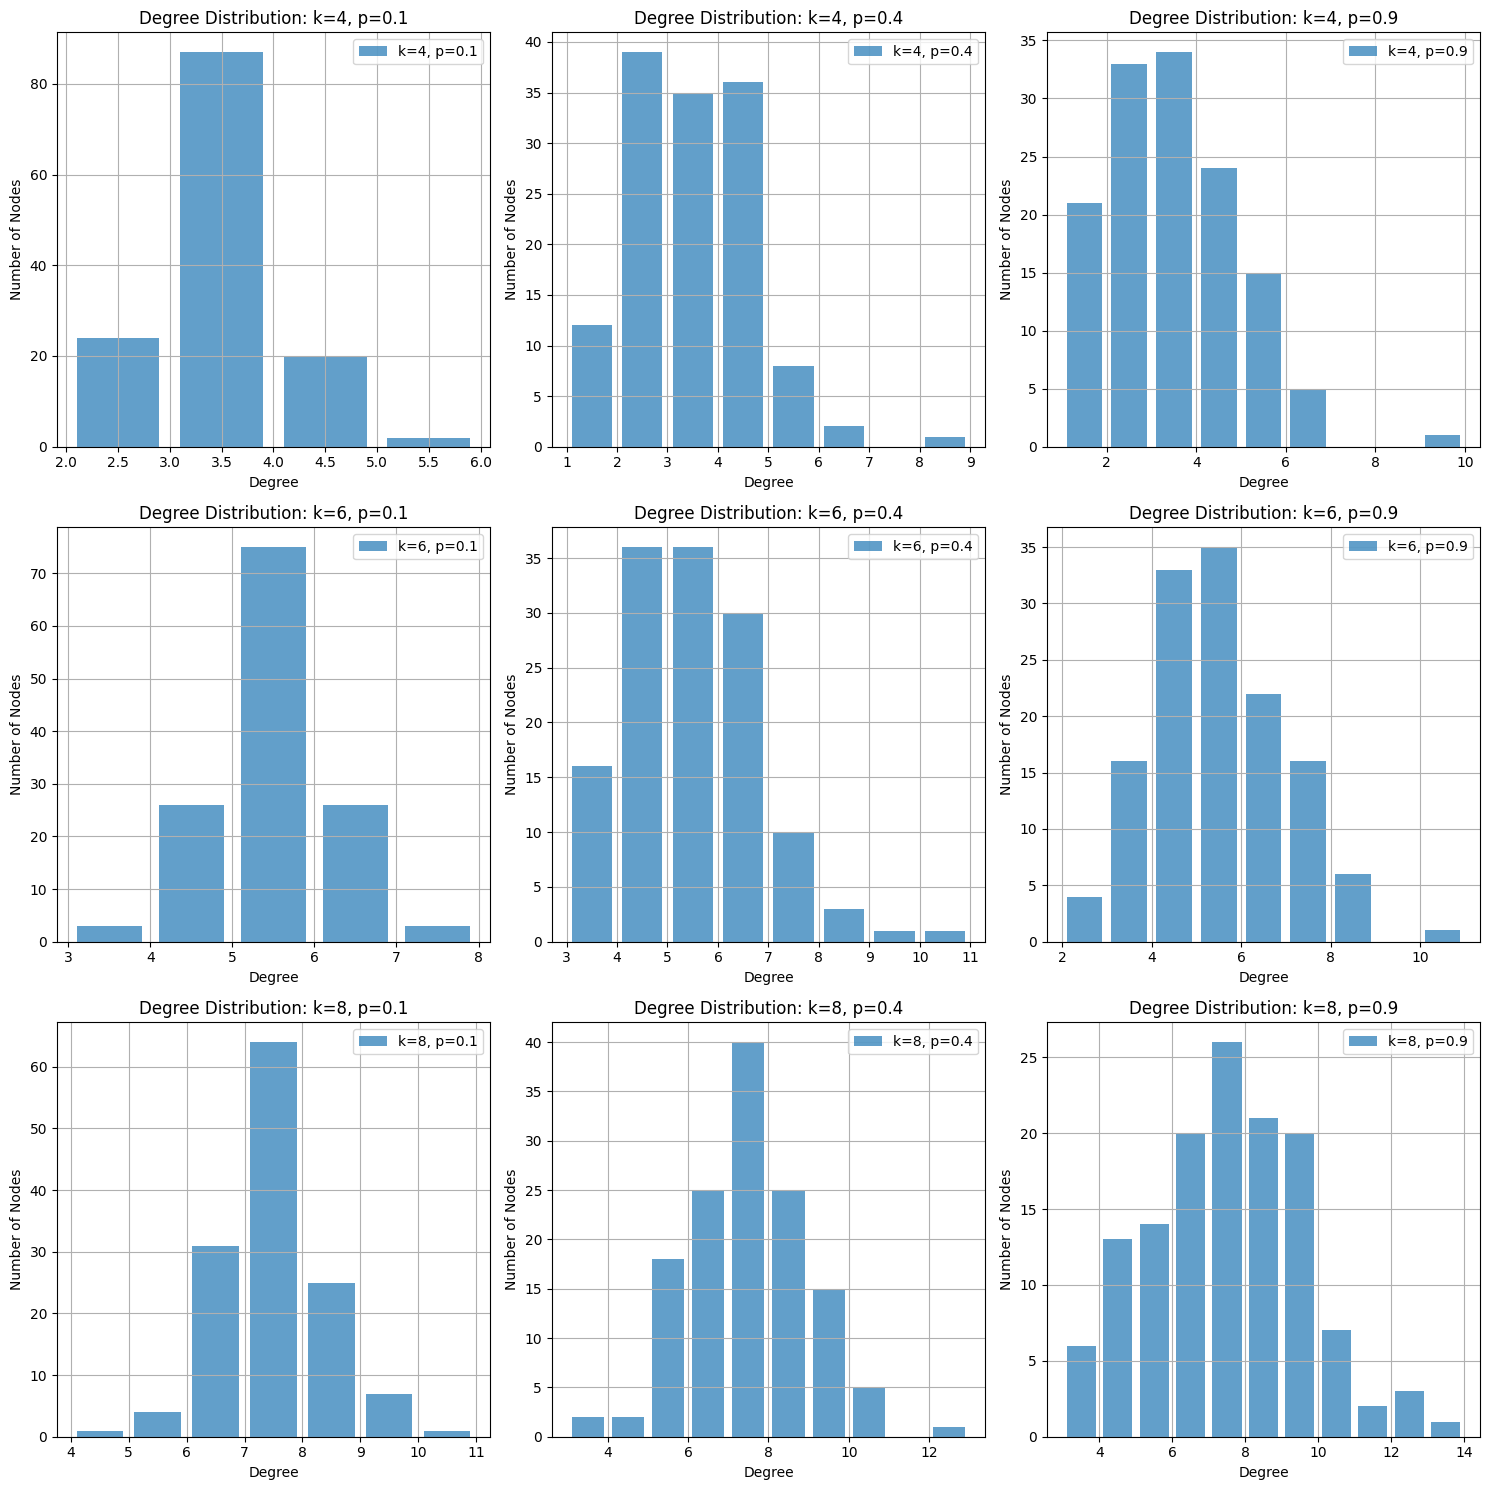

In [20]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))  

axs = axs.flatten()

# Plot degree distributions in each subplot
for idx, ((k, p), (bins, distribution)) in enumerate(degree_distributions.items()):
    axs[idx].bar(bins, distribution, width=0.8, label=f'k={k}, p={p}', alpha=0.7)
    axs[idx].set_title(f'Degree Distribution: k={k}, p={p}')
    axs[idx].set_xlabel('Degree')
    axs[idx].set_ylabel('Number of Nodes')
    axs[idx].legend()
    axs[idx].grid()

plt.tight_layout()
plt.show()

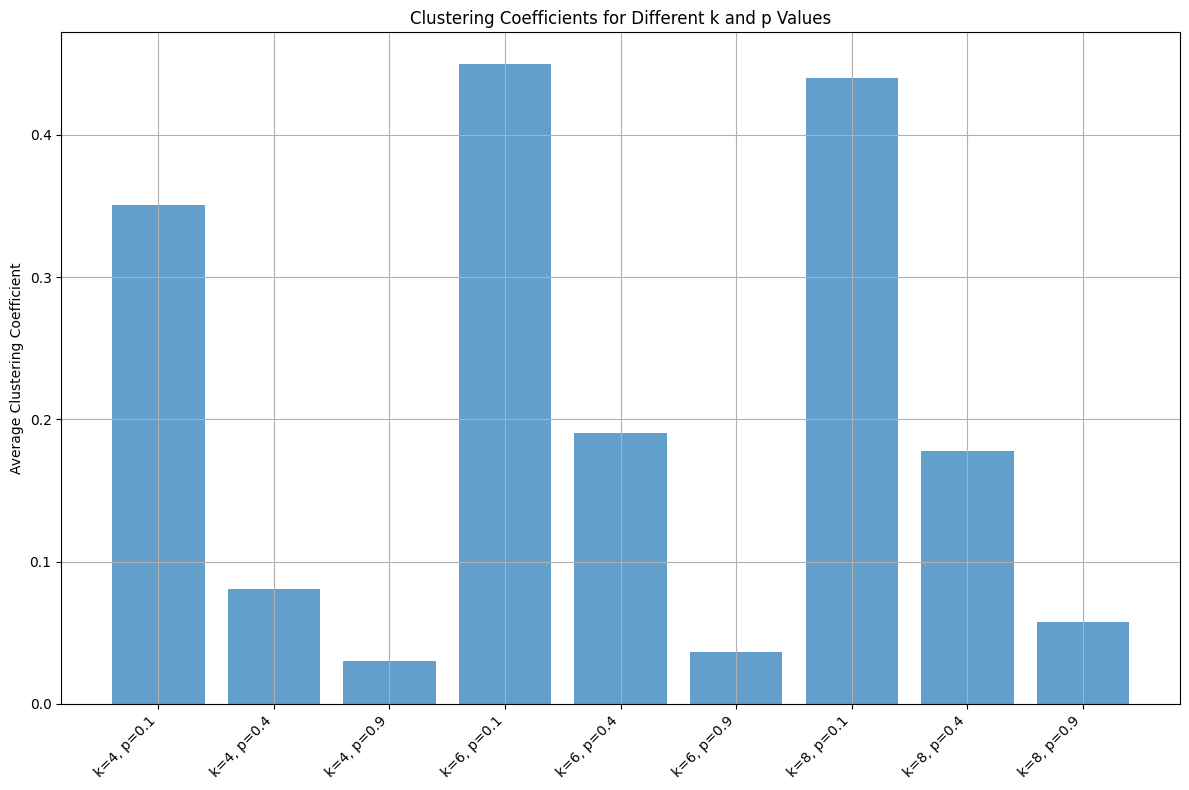

In [21]:
# Plot clustering coefficients 
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar([f'k={k}, p={p}' for k, p in clustering_coefficients.keys()],
       clustering_coefficients.values(), alpha=0.7)

ax.set_title('Clustering Coefficients for Different k and p Values')
ax.set_ylabel('Average Clustering Coefficient')
ax.grid()
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [22]:
clustering_coefficients

{(4, 0.1): 0.3508771929824563,
 (4, 0.4): 0.08087480606277594,
 (4, 0.9): 0.030421291323546967,
 (6, 0.1): 0.4496240601503761,
 (6, 0.4): 0.19034816478425487,
 (6, 0.9): 0.03646508045004285,
 (8, 0.1): 0.44027384478512277,
 (8, 0.4): 0.17788301923640262,
 (8, 0.9): 0.05764899261139856}

## (b) Generate scale-free graphs, and each of them should have the same number of nodes as FacebookEgo. Please generate 3 graphs with three different values of γ. Please plot the graph structures, degree distributions, and clustering coefficients as well.


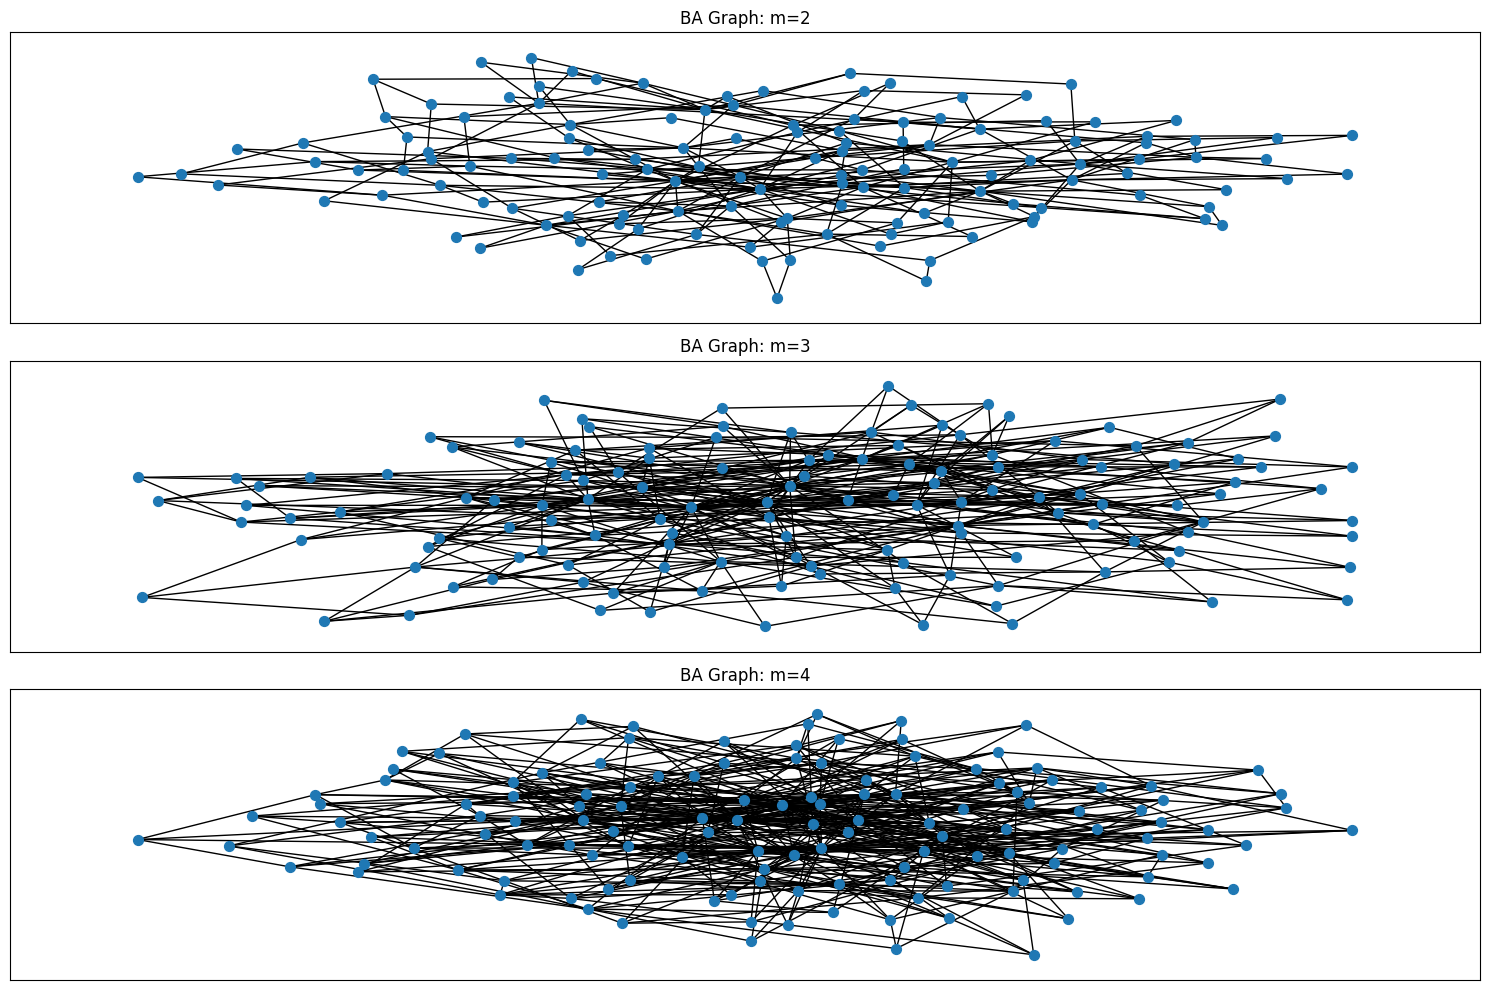

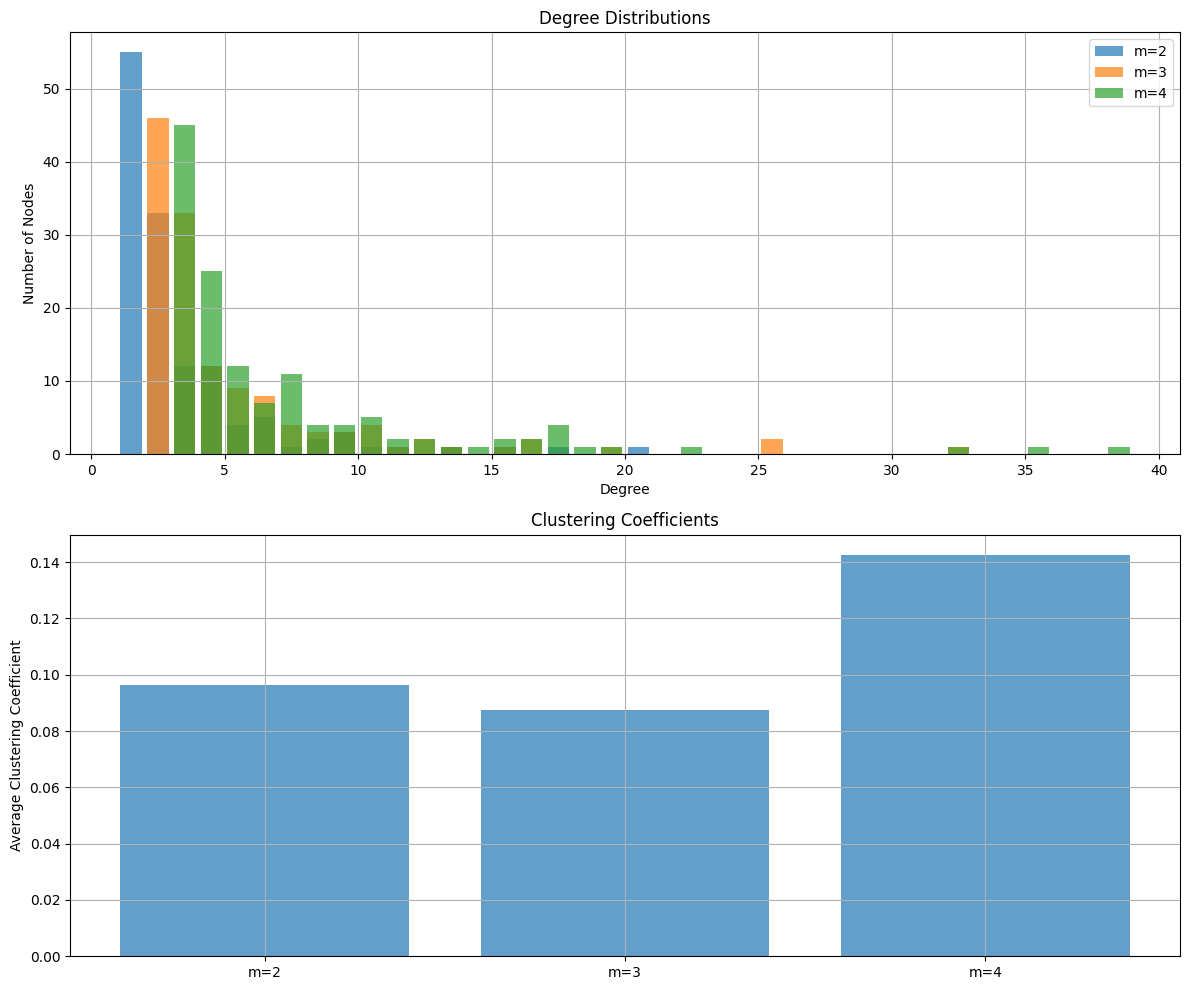

In [7]:
# Set parameters for the number of nodes (Facebook-Ego network size)
n = 133  # Number of nodes
m_values = [2, 3, 4]  # Number of edges to attach from a new node to existing nodes

# Prepare plots for the graph structures and clustering coefficients
fig, axs = plt.subplots(len(m_values), 1, figsize=(15, 10))

# Store clustering coefficients and degree distributions for analysis
clustering_coefficients = {}
degree_distributions = {}

# Generate graphs and plots
for i, m in enumerate(m_values):
    # Generate Barabási-Albert graph
    G = nx.barabasi_albert_graph(n, m)
    
    # Plot the graph structure
    axs[i].set_title(f'BA Graph: m={m}')
    nx.draw_networkx(G, node_size=50, ax=axs[i], with_labels=False, pos=nx.spring_layout(G, seed=42))

    # Calculate clustering coefficient
    clustering_coeff = nx.average_clustering(G)
    clustering_coefficients[m] = clustering_coeff
    
    # Degree distribution
    degrees = [G.degree(n) for n in G.nodes()]
    degree_distribution, bins = np.histogram(degrees, bins=np.arange(min(degrees), max(degrees) + 1.5) - 0.5)
    degree_distributions[m] = (bins[:-1], degree_distribution)

# Adjust layout for graph plots
plt.tight_layout()
plt.show()

# Plot degree distributions and clustering coefficients
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot degree distributions
for m, (bins, distribution) in degree_distributions.items():
    axs[0].bar(bins, distribution, width=0.8, label=f'm={m}', alpha=0.7)

axs[0].set_title('Degree Distributions')
axs[0].set_xlabel('Degree')
axs[0].set_ylabel('Number of Nodes')
axs[0].legend()
axs[0].grid()

# Plot clustering coefficients
axs[1].bar([f'm={m}' for m in clustering_coefficients.keys()],
           clustering_coefficients.values(), alpha=0.7)
axs[1].set_title('Clustering Coefficients')
axs[1].set_ylabel('Average Clustering Coefficient')
axs[1].grid()

plt.tight_layout()
plt.show()

## (c) Generate graphs based on Barab´asi-Albert Model, and each of them should have the same number of nodes as Facebook-Ego. Please generate 9 graphs with three different values of m0 and m. Please plot the graph structures, degree distributions, and clustering coefficients as well.


## (d) Please compare your Facebook-Ego network, Twitter-Ego network with the generated random graphs in (a), (b) and (c). Which random graph(s) approximates your networks at most? Why?
